In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math
import itertools
from scipy.optimize import curve_fit, minimize
import h5py
mpl.rcParams['text.usetex'] = True
%matplotlib inline
#import random #MI: millor fes servir np.random.normal
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import pandas as pd

In [3]:
!apt-get install -y texlive texlive-fonts-recommended texlive-fonts-extra texlive-latex-extra
!sudo apt install texlive-fonts-extra cm-super
!sudo apt install dvipng -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive is already the newest version (2021.20220204-1).
texlive-fonts-extra is already the newest version (2021.20220204-1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
texlive-fonts-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
dvipng is already the newest version (1.15-1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


#Importing the data set

In GitHub we have two directories with diferent nodes in their spatial dimension 16x128 and 24x128. In each directory there are several files with the correlator data from pions, protons, etc.

We can work with any of the files there, here as an example we are using the file:



```
px0py0pz0_pi_Nsrc224_Ncfg2001_16x128_um0p0840_sm0p0743_P.dat
```


*   px0py0pz0: means that the data are projected to zero moment
*   pi: pion data
*   Nsc224: number of sources taken randomly from the 2001 configurations
*   Ncfg: number rof configurations
*   16x128: means that there are 16 nodes for each spatial dimension and 128 in the temporal
*   um0p0840: mass of u and d
*   sm0p0743: mass of s
*   P: type of sink "P" means local sink (point-like), "S" means smeared sink (gaussian-type) both with smeared source. "SS" smeared source and sink, "PP" local source and sink, "SP" local source and smeared sink

We sownload the raw for the data.


In [ ]:
f = open("/content/px0py0pz0_pi_Nsrc224_Ncfg2001_16x128_um0p0840_sm0p0743_P.dat", "rt")
#f.read()

The same could be done using pandas if wanted.

In [ ]:
# Step 1: Read the .dat file, skipping the first row (header)
df = pd.read_csv('/content/px0py0pz0_pi_Nsrc224_Ncfg2001_16x128_um0p0840_sm0p0743_P.dat', delim_whitespace=True, skiprows=1, header=None)

# Step 2: Extract only the second column, because we only need the numbers in the second column
second_column = df[1]

# Step 3: Reshape the data into a DataFrame with 2001 rows and 128 columns
reshaped_df = second_column.values.reshape((2001, 128))

# Step 4: Convert the reshaped array into a DataFrame
final_df = pd.DataFrame(reshaped_df)

In [ ]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.007575,0.005935,0.005268,0.004681,0.004183,0.003762,0.003402,0.003089,0.002817,0.002574,...,0.002375,0.002583,0.002821,0.003095,0.003407,0.003765,0.004183,0.004678,0.005261,0.005925
1,0.007739,0.006103,0.005438,0.004848,0.004350,0.003926,0.003562,0.003250,0.002980,0.002742,...,0.002571,0.002786,0.003026,0.003298,0.003608,0.003959,0.004369,0.004860,0.005439,0.006097
2,0.007878,0.006192,0.005518,0.004924,0.004413,0.003977,0.003604,0.003277,0.002992,0.002745,...,0.002496,0.002721,0.002974,0.003259,0.003588,0.003969,0.004407,0.004919,0.005509,0.006182
3,0.007865,0.006177,0.005514,0.004929,0.004429,0.004004,0.003638,0.003316,0.003030,0.002775,...,0.002530,0.002757,0.003010,0.003291,0.003612,0.003984,0.004418,0.004920,0.005508,0.006173
4,0.007480,0.005792,0.005134,0.004557,0.004068,0.003653,0.003290,0.002973,0.002698,0.002455,...,0.002233,0.002447,0.002687,0.002961,0.003274,0.003637,0.004057,0.004549,0.005128,0.005794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.007472,0.005822,0.005165,0.004590,0.004104,0.003690,0.003334,0.003024,0.002759,0.002530,...,0.002353,0.002560,0.002790,0.003052,0.003353,0.003702,0.004108,0.004588,0.005159,0.005821
1997,0.007193,0.005582,0.004938,0.004380,0.003906,0.003498,0.003142,0.002842,0.002588,0.002372,...,0.002293,0.002477,0.002685,0.002926,0.003217,0.003563,0.003962,0.004425,0.004978,0.005608
1998,0.007755,0.006063,0.005397,0.004814,0.004320,0.003898,0.003542,0.003235,0.002961,0.002712,...,0.002516,0.002732,0.002978,0.003253,0.003571,0.003938,0.004360,0.004855,0.005434,0.006088
1999,0.008057,0.006387,0.005714,0.005123,0.004626,0.004220,0.003875,0.003567,0.003294,0.003047,...,0.002734,0.002959,0.003210,0.003495,0.003815,0.004187,0.004609,0.005106,0.005706,0.006385


# Processing the data with the bootsrap and jacknife methods

There are two methods to reduce bias from a data set, the bootstrap and the jackknife. We can compute the effective mass and the correlator with both methods obtaining minor differences between them.

In [ ]:
# Defining the constants
nsc = 2001        #Number of configurations
nt = 128          #Time intervals
nboot = nsc       #N_b


# Variables related to the constants
nsc_ = 1.0 / nsc
nsc1_ = 1.0 / (nsc - 1)
nboot_ = 1.0 / nboot
nbot_ = 1.0 / (nboot - 1)

In [ ]:
# Convert dataframe to numpy array
blck = final_df.values

# Calculate pmean: same for bootstrap and jacknife (depends on the dataset)
# Mean for each time (column)
pmean=np.zeros(nt)
for k in range(nt):
    pm=0.0
    for i in range(nsc):
        pm+=blck[i,k]
    pmean[k] = pm * nsc_

## Bootstrap method

From an original sample we read $N$ configurations of the correlator $C_i(t)$.

With the bootstrap method we create $N_b$ bootstrap samples $C_b(t)$, where each one is obtained from a random selection from the original sample $N$ points (with repetitions allowed)

$$ C_b(t)=\frac{1}{N} \sum_{i=1}^{N} C_{\text{rand}(i)}(t) $$

To compute the effective mass for each bootstrap sample and its main value we use

$$ E_b=\frac{1}{t_J}\log\frac{C_b(t)}{C_b(t+t_J)} $$

with $t_J=1$ and

$$ \bar{E}(t)=\frac{1}{N_b}\sum_{b=1}^{N_b}E_b(t) $$

With this we get the effective mass for each time, and in order to compute the corresponding error we use

$$ \sigma(t)=\sqrt{\frac{N}{N_b(N-1)}\sum_{b=1}^{N_b}(E_b(t)-\bar{E}(t))^2} $$

In [ ]:
# BOOTSTRAP METHOD

# Generate random numbers
x = np.random.rand(nsc, nboot)

# Pmean_boot=C_b(t)
pmean_boot=np.zeros((nboot,nt))
for k in range(nt):
    for j in range(nboot):
        boot = 0.0
        for i in range(nsc):
            boot += blck[int(x[i, j] * nsc), k]  # blck=C_rand(i,t)= randomly C_i(t)
        pmean_boot[j, k] = boot * nsc_

# Calculate EMpoint_boot=E_b(t)
kt=1    #lag parameter
EMpoint_boot=np.zeros((nboot,nt-kt))
for k in range(nt-kt):
    for j in range(nboot):
        EMpoint_boot[j, k] = np.log(pmean_boot[j, k] / pmean_boot[j, k + kt]) / kt


# Calculate mean for each time point (Sum E_b)
mean_boot=np.zeros(nt-kt)
mean_boot = np.sum(EMpoint_boot, axis=0) * nboot_

# Calculate sigma for each time point
sigma_boot=np.zeros(nt-kt)
var_boot=np.zeros(nt-kt)
for k in range(nt-kt):
    var_boot[k] = np.sum((EMpoint_boot[:, k] - mean_boot[k]) ** 2) * nboot_ * nsc * nsc1_
sigma_boot = np.sqrt(var_boot)


In [ ]:
# Saving the results as data frames

# Save mean and sigma
bootresults_df = pd.DataFrame({
    'Time': np.arange(nt-kt),
    'Mean': mean_boot,
    'Sigma': sigm_boot
})
bootresults_df.to_csv('EMP_prot_boot.csv', index=False, float_format='%.6f')

# Save random numbers (x)
x_df = pd.DataFrame(x)
x_df.to_csv('EMP_prot_boot_x.csv', index=False, float_format='%.6f')

# Save EMpoint
bootempoint_df = pd.DataFrame(EMpoint_boot)
bootempoint_df.to_csv('EMP_prot_boot_param.csv', index=False, float_format='%.6f')

In [ ]:
# BOOTSTRAP RESULTS
bootresults_df

,Time,Mean,Sigma
0,0,0.239870,0.000284
1,1,0.113044,0.000284
2,2,0.110995,0.000284
3,3,0.105554,0.000284
4,4,0.100124,0.000284
...,...,...,...
122,122,-0.095163,0.000284
123,123,-0.100146,0.000284
124,124,-0.105581,0.000284
125,125,-0.111126,0.000284


## Jacknife

Considering an original sample containing $N$ configurations, the jackknife samples are constructed by taking the average of the variable $x$ without including the $n$th sample

$$ x_n^J =\frac{1}{N-1}\sum_{m\neq n}x_m =\frac{N}{N-1}\bar{x}-\frac{1}{N-1}x_n $$

Then the mean value of the function $f$ and estimation of its uncertainty is evaluated as:

$$ f(X)\simeq \bar{f}_x^J=\frac{1}{N}\sum_{n=1}^N f(x_n^J) $$
$$ \sigma_{f(X)}^2 \simeq \frac{N-1}{N}\sum_{n=1}^N [f(n_n^J)-\bar{f}_x^J]^2 $$

In [ ]:
# JACKNIFE METHOD

# Pmean_jk
pmean_jk=np.zeros((nsc,nt))
for k in range(nt):
    for j in range(nsc):
        pmean_jk[j, k] = (pmean[k] * nsc - blck[j, k]) * nsc1_


# Calculate EMpoint_jk
kt=1
EMpoint_jk=np.zeros((nsc,nt-kt))
for k in range(nt-kt):
    for j in range(nsc):
        EMpoint_jk[j, k] = np.log(pmean_jk[j, k] / pmean_jk[j, k + kt]) / kt

# Calculate mean for each time point (Sum E_b)
mean_jk=np.zeros(nt-kt)
mean_jk = np.sum(EMpoint_jk, axis=0) * nsc_

# Calculate sigma for each time point
sigma_jk=np.zeros(nt-kt)
var_jk=np.zeros(nt-kt)
for k in range(nt-kt):
    var_jk[k] = np.sum((EMpoint_jk[:, k] - mean_jk[k]) ** 2) * nsc_ * (nsc - 1)
sigma_jk = np.sqrt(var_jk)


In [ ]:
# Saving the results as data frames

# Save mean and sigma
jkresults_df = pd.DataFrame({
    'Time': np.arange(nt-kt),
    'Mean': mean_jk[:],
    'Sigma': sigma_jk[:]
})
jkresults_df.to_csv('EMP_prot_jk.csv', index=False, float_format='%.6f')

# Save EMpoint
jkempoint_df = pd.DataFrame(EMpoint_jk)
jkempoint_df.to_csv('EMP_prot_jk_param.csv', index=False, float_format='%.6f')

In [ ]:
# JACKNIFE RESULTS
jkresults_df

,Time,Mean,Sigma
0,0,0.239864,0.000268
1,1,0.113043,0.000148
2,2,0.110994,0.000156
3,3,0.105552,0.000157
4,4,0.100122,0.000158
...,...,...,...
122,122,-0.095159,0.000154
123,123,-0.100142,0.000156
124,124,-0.105578,0.000159
125,125,-0.111123,0.000157


## Correlator

We compute the correlator with both the bootstrap and the jacknife method.

In [ ]:
# Compute mean and standard deviation of the correlator
# For the bootstrap
mcor_boot = np.mean(pmean_boot[:,:-1], axis=0)
vcor_boot = np.mean((pmean_boot[:,:-1] - mcor_boot) ** 2, axis=0) * nsc * nsc1_
scor_boot = np.sqrt(vcor_boot)

# For the jacknife
mcor_jk = np.mean(pmean_jk[:,:-1], axis=0)
vcor_jk = np.mean((pmean_jk[:,:-1] - mcor_jk) ** 2, axis=0) * nsc * nsc1_
scor_jk = np.sqrt(vcor_jk)

In [6]:
# Plot data
def plot_data(x_data, y_data_list, y_err_list, plot_title, xlabel, ylabel, xlim, scale, y_leg_list, legend, fit_line=None, fill_between=None):
    # Configure plot settings
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif', size='12')

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95, wspace=0.21, hspace=0.2)

    ax.set_title(plot_title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(xlim)
    ax.set_yscale(scale)
    ax.minorticks_on()
    ax.tick_params(which='both', direction='in')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')

    # Plot each dataset with error bars
    for i, (y_data, y_err, y_leg) in enumerate(zip(y_data_list, y_err_list, y_leg_list)):
        ax.errorbar(x_data, y_data, yerr=y_err, fmt='o', markersize=3, capsize=1, elinewidth=0.7, label=y_leg)

    if fit_line is not None:
        ax.plot(fit_line[0], fit_line[1], 'r-', label=f'fit: {fit_line[2]}')

    if fill_between is not None:
        ax.fill_between(fill_between[0], fill_between[1], fill_between[2], color='#ffcccc')

    if legend:
        ax.legend()

    # Display the plot
    plt.show()


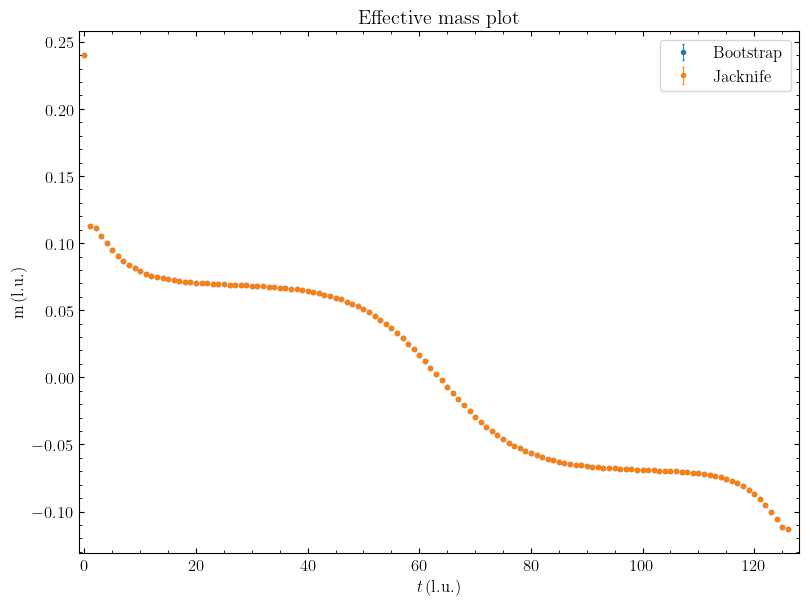

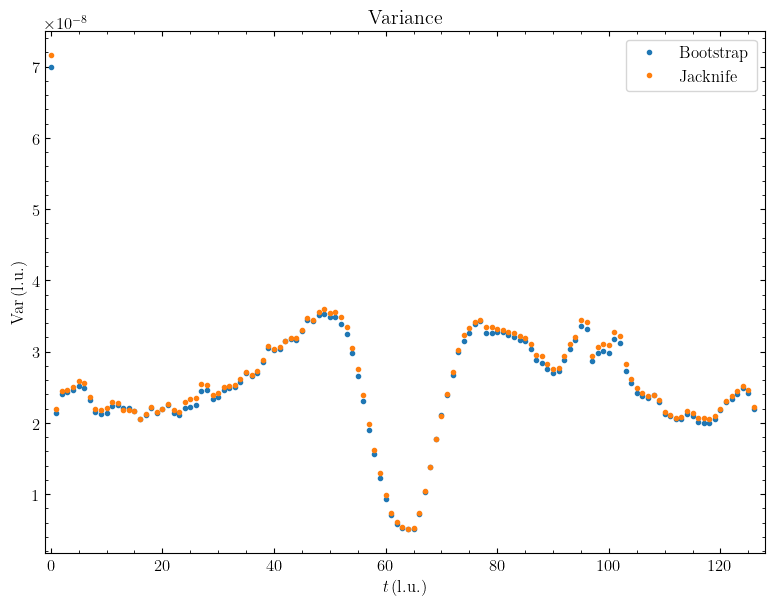

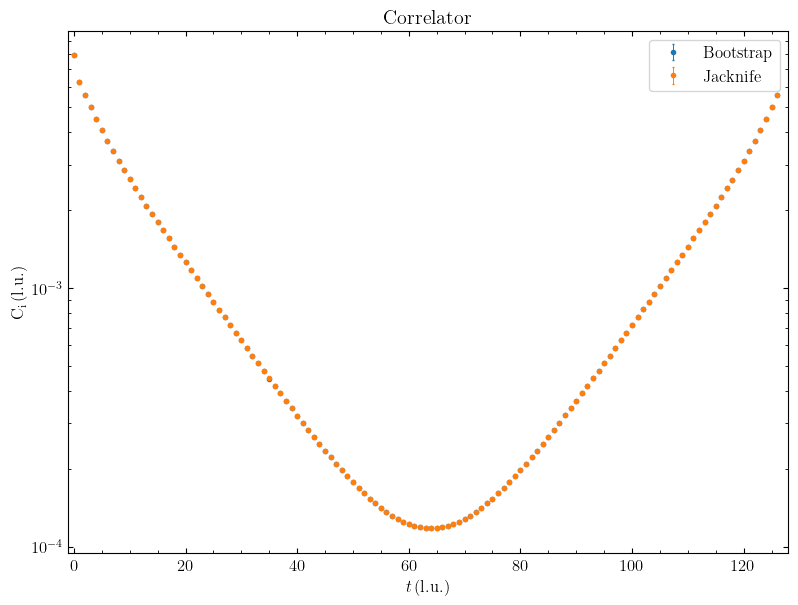

In [ ]:
# Plot results m(t)
plot_data(
    x_data=np.arange(nt-1),
    y_data_list=[mean_boot, mean_jk],
    y_err_list=[sigma_boot, sigma_jk],
    plot_title='Effective mass plot',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{m} \,\mathrm{(l.u.)}$',
    xlim=[-1, 128],
    scale='linear',
    y_leg_list=['Bootstrap', 'Jacknife'],
    legend=True
)

# Plot results variance
plot_data(
    x_data=np.arange(nt-1),
    y_data_list=[var_boot, var_jk],
    y_err_list=[None, None],
    plot_title='Variance',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{Var} \,\mathrm{(l.u.)}$',
    xlim=[-1, 128],
    scale='linear',
    y_leg_list=['Bootstrap', 'Jacknife'],
    legend=True
)

# Plot results correlator
plot_data(
    x_data=np.arange(nt-1),
    y_data_list=[mcor_boot, mcor_jk],
    y_err_list=[scor_boot, scor_jk],
    plot_title='Correlator',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{C_i} \,\mathrm{(l.u.)}$',
    xlim=[-1, 128],
    scale='log',
    y_leg_list=['Bootstrap', 'Jacknife'],
    legend=True
)

## Comparing some data

In this part we only work with the bootstrap data but can easly be changed to jacknife building another function.

```
mean_sigma_jk(blck,nsc,nt)
```

Converting all the process above to a single function to make it quiker.

In [4]:
def mean_sigma_boot(blck,nsc,nt,nboot):
    # Compute pmean using the numpy function mean for the nsc axis
    pmean=np.zeros((nboot,nt))
    pmean = np.mean(blck, axis=0)

    # Bootstrap sampling
    # Generate bootstrap indices
    pmeanboot=np.zeros((nboot,nt))
    x = np.random.uniform(size=(nsc, nboot))
    for k in range(nt):
        for j in range(nboot):
            for i in range(nsc):
                pmeanboot[j,k]+=blck[int(x[i,j]*nsc),k]
            pmeanboot[j,k]*=nsc_

    # Compute EMpoint
    kt = 1
    EMpoint=np.zeros((nboot,nt-kt))
    EMpoint = np.log(pmeanboot[:, :-kt] / pmeanboot[:, kt:]) / kt   # Shape (nboot, nt - kt)/Shape (nboot, nt - kt)

    # Compute mean and standard deviation of EMpoint
    mean = np.mean(EMpoint, axis=0)
    variance = np.mean((EMpoint - mean) ** 2, axis=0) * nsc * nsc1_
    sigma = np.sqrt(variance)

    # Compute mean and standard deviation of the correlator
    E_b=EMpoint.T

    mean_cor = np.mean(pmeanboot[:,:-1], axis=0)
    variance_cor = np.mean((pmeanboot[:,:-1] - mean_cor) ** 2, axis=0) * nsc * nsc1_
    sigma_cor = np.sqrt(variance_cor)

    return mean, sigma, mean_cor, sigma_cor, E_b

In [5]:
def read_data(filename):
    df = pd.read_csv(filename, delim_whitespace=True, skiprows=1, header=None)
    second_column = df[1]
    reshaped_df = second_column.values.reshape((2001, 128))
    final_df = pd.DataFrame(reshaped_df)

    return final_df

Data sets:

In [ ]:
# Defining the constants
nsc = 2001        #Number of configurations
nt = 128          #Time intervals
nboot = nsc       #N_b


# Variables related to the constants
nsc_ = 1.0 / nsc
nsc1_ = 1.0 / (nsc - 1)
nboot_ = 1.0 / nboot
nbot_ = 1.0 / (nboot - 1)

In [ ]:
# Reading again the data in case we need to change it:
# Pion 16x128 P
df_piP = read_data('/content/px0py0pz0_pi_Nsrc224_Ncfg2001_16x128_um0p0840_sm0p0743_P.dat')
# Pion 16x128 S
df_piS = read_data('/content/px0py0pz0_pi_Nsrc224_Ncfg2001_16x128_um0p0840_sm0p0743_S.dat')
# Proton 16x128 P
df_pro = read_data('/content/px0py0pz0_prot_Nsrc224_Ncfg2001_16x128_um0p0840_sm0p0743_P.dat')


# Convert dataframe to numpy array
blck_piP = df_piP.values
blck_piS = df_piS.values
blck_pro = df_pro.values

# Compute the mean and sigma for the mass and for the correlator. We use the same values for nsc, nt and nboot
mean_piP, sigma_piP, mcor_piP, scor_piP, E_piP = mean_sigma_boot(blck_piP, nsc, nt, nboot)
mean_piS, sigma_piS, mcor_piS, scor_piS, E_piS = mean_sigma_boot(blck_piS, nsc, nt, nboot)
mean_pro, sigma_pro, mcor_pro, scor_pro, E_pro = mean_sigma_boot(blck_pro, nsc, nt, nboot)

<ipython-input-4-c3d85a26cb86>:19: RuntimeWarning: invalid value encountered in log
  EMpoint = np.log(pmeanboot[:, :-kt] / pmeanboot[:, kt:]) / kt   # Shape (nboot, nt - kt)/Shape (nboot, nt - kt)


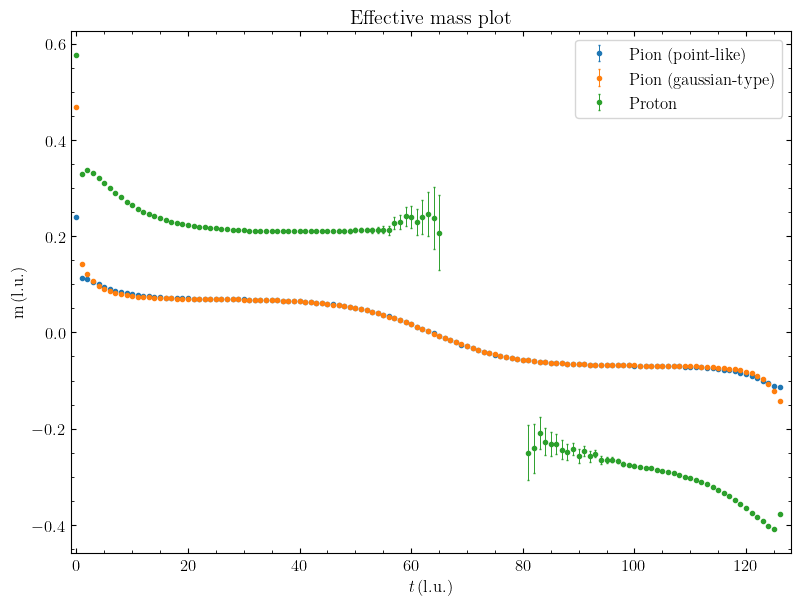

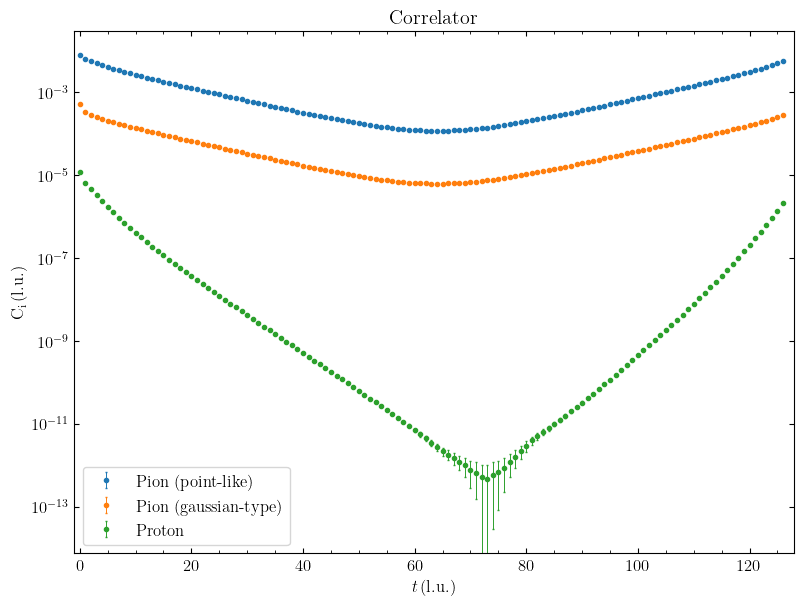

In [ ]:
# Plot results m(t)
plot_data(
    x_data=np.arange(nt-1),
    y_data_list=[mean_piP, mean_piS, mean_pro],
    y_err_list=[sigma_piP, sigma_piS, sigma_pro],
    plot_title='Effective mass plot',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{m} \,\mathrm{(l.u.)}$',
    xlim=[-1, 128],
    scale='linear',
    y_leg_list=['Pion (point-like)', 'Pion (gaussian-type)', 'Proton'],
    legend=True
)

# Plot results correlator
plot_data(
    x_data=np.arange(nt-1),
    y_data_list=[mcor_piP, mcor_piS, mcor_pro],
    y_err_list=[scor_piP, scor_piS, scor_pro],
    plot_title='Correlator',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{C_i} \,\mathrm{(l.u.)}$',
    xlim=[-1, 128],
    scale='log',
    y_leg_list=['Pion (point-like)', 'Pion (gaussian-type)', 'Proton'],
    legend=True
)

We see that the data above have a really long temporal dimension. Due to the boundary conditions being antiperiodic we see this behaviour (where at t=60 the data repeatd but shifted).

# Fitting the data

## Effective mass

With the effective mass ploted and working only with time up to 60 for better results, we fit the plots with linear and exponentials curves.

Let's use as an example the pion file that we have been working with

In [10]:
# Defining the constants
nsc = 2001        #Number of configurations
nt = 60           #Time intervals
nboot = nsc       #N_b


# Variables related to the constants
nsc_ = 1.0 / nsc
nsc1_ = 1.0 / (nsc - 1)
nboot_ = 1.0 / nboot
nbot_ = 1.0 / (nboot - 1)

# Reading again the data in case we need to change it:
# Pion 16x128 P
df_pi = read_data('/content/px0py0pz0_pi_Nsrc224_Ncfg2001_16x128_um0p0840_sm0p0743_P.dat')
blck_pi = df_pi.values
mean_pi, sigma_pi, mcor_pi, scor_pi, E_pi = mean_sigma_boot(blck_pi, nsc, nt, nboot)

# Data computed for the pion example
E_b=E_pi
xboot=np.arange(nt-1)
yboot=mean_pi
eboot=sigma_pi
xboot_cor=np.arange(nt-1)
yboot_cor=mcor_pi
eboot_cor=scor_pi

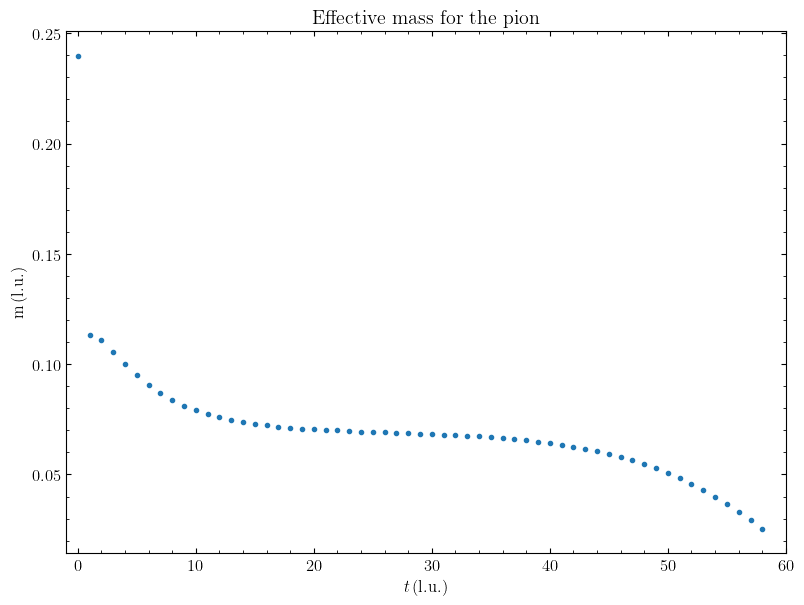

In [11]:
# Remember the shape of the effective mass
plot_data(
    x_data=xboot,
    y_data_list=[yboot],
    y_err_list=[eboot],
    plot_title='Effective mass for the pion',
    xlabel=r'$t \,\mathrm{(l.u.)}$',
    ylabel=r'$\mathrm{m} \,\mathrm{(l.u.)}$',
    xlim=[-1, nt],
    scale='linear',
    y_leg_list=[None],
    legend=False
)

## Linear and exponential fits

By looting at the plot we set the time interval in which we will make the fit.

We compute two fits:

$$ f_l(t)=k \hspace{2cm} f_e(t)=ae^{-bt}+c $$

The linear form assumes that we are in the plateaux region, with no excited state contribution. The exponential one takes into account, additionally, one contribution from an excited state, which in principle allows us to start the fit at earlier times. But for the sake of simplicity we will use the same time interval for both.

We can also compute the corresponding $\chi^2$ using:

$$ \chi^2=\sum_{t,t'}[\bar{E}(t)-f(t)](cov(t,t'))^{-1}[\bar{E}(t')-f(t')] $$

where $cov(t,t')$ is the covariance matrix

$$ cov(t,t')=\frac{N}{N-1}\frac{N_b}\sum_{b=1}^{N_b}[E_b(t)-\bar{E}(t)][E_b(t')-\bar{E}(t')] $$

In [12]:
# Fit functions
def func_l(t, d):
    return d

def func_e(t, a, b, c):
    return a * np.exp(-b * t) + c

def func_e2(t, c):
    return c[0] * np.exp(-c[1] * t) + c[2]

In [13]:
# Compute the covariance matrix
cov_t=np.zeros((nt-1,nt-1))
for l in range(0,nt-1): #l rows of cov, t
    for c in range(0,nt-1): #c columns of cov, t'
        sum=0
        for p in range(0,nboot): #sumatori de les b per acada element de la matriu t,t'
            sum+=(E_b[l][p]-yboot[l])*(E_b[c][p]-yboot[c])
        cov_t[l][c]=sum*(nsc/(nsc-1))/nboot
cov_t=np.array(cov_t)

In [21]:
#Time interval
i=12
f=30

#Mida de l'interval
j=f-i+1
#Matriu de covariància per al interval conctret de temps=cov
cov=cov_t[i-1:f,i-1:f]
cov_=np.linalg.inv(cov)     #inversa de la matriu covariant
#Trobem lo millor fit minimitzant la chi2
#Com la matriu cov ja esta feta per a aquest interval de temps corresponent, creo dos contadors: n,m
fun_chi_l = lambda c: np.sum([
    (yboot[x-1] - func_l(x-1, c)) * cov_[n][m] * (yboot[y-1] - func_l(y-1, c))
    for n, x in enumerate(range(i, f + 1))
    for m, y in enumerate(range(i, f + 1))
])

fun_chi_e = lambda c: np.sum([
    (yboot[x-1] - func_e2(x-1, c)) * cov_[n][m] * (yboot[y-1] - func_e2(y-1, c))
    for n, x in enumerate(range(i, f + 1))
    for m, y in enumerate(range(i, f + 1))
])

#Ajustar a ma els primers guess de les constants
c0=[0.1] #First guess de la c

x0=[0.,1.,0.1] #First guesses de la a,b,c
bnds=((0.,1.),(-20.,20.),(-3.,3.))#Mateixos bounds que usats antes

#Lineal
res_l=minimize(fun_chi_l,c0,method='Nelder-Mead',tol=1e-6)
c_l=res_l.x
central_l=c_l[0]
fit_l=c_l
#Exponencial
res_e=minimize(fun_chi_e,x0,method='Nelder-Mead',bounds=bnds,tol=1e-6)
c_e=res_e.x
central_e=c_e[2]
fit_e=c_e

#En aixó hem trobat los valors de les c i c_llista que minimitzen la chi2
#Ara calculem la chi en estos valors
#Graus de llibertat=(sample size=j=mida del interval) - parametres
dof_l=j-1
dof_e=j-3
chi2_l=fun_chi_l(res_l.x[0])/dof_l
chi2_e=fun_chi_e(res_e.x)/dof_l


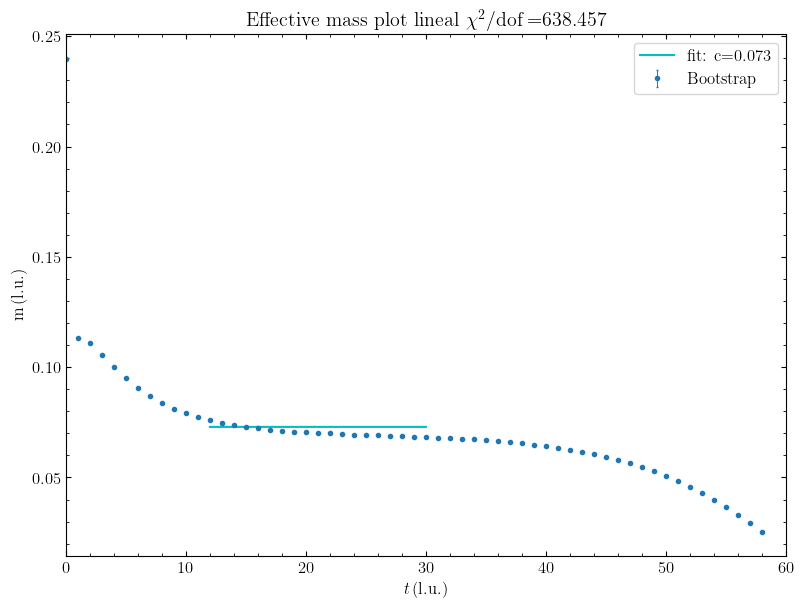

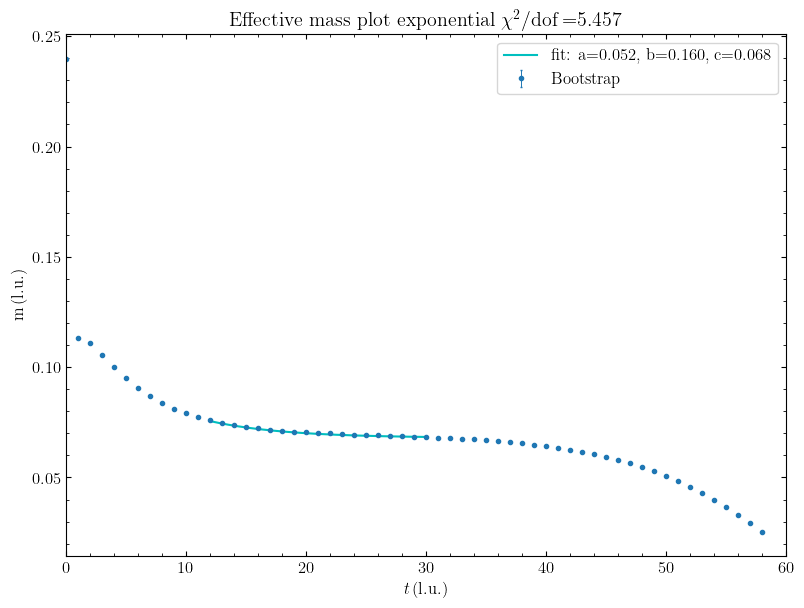

In [29]:
#Per fer el plot dels ajustos
xplot=np.linspace(i,f,num=(f-i)*100)
yplot_l=[]
for num in range(0,(f-i)*100):
    yplot_l.append(func_l(xplot, c_l[0]))
yplot_e=func_e(xplot, c_e[0],c_e[1],c_e[2])

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size='12')

fig = plt.figure(figsize=(8,6))

plt.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95, wspace=0.21, hspace=0.2)


#PLOT LINEAL
fig1 = fig.add_subplot(1,1,1)
fig1.set_title('Effective mass plot lineal $\mathrm{\chi^2/dof}$\,=%5.3f' % chi2_l)
fig1.set_ylabel(r'$\mathrm{m} \,\mathrm{(l.u.)}$')
fig1.set_xlabel(r'$t \,\mathrm{(l.u.)}$')
fig1.set_xlim([0,nt])
plt.minorticks_on()
fig1.axes.tick_params(which='both',direction='in')
fig1.yaxis.set_ticks_position('both')
fig1.xaxis.set_ticks_position('both')
fig1.errorbar(xboot,yboot, yerr=eboot, ls='None', marker='o', markersize=3, capsize=1, elinewidth=0.7,label="Bootstrap")

#Plot del ajust
plt.plot(xplot, yplot_l, 'c-', label='fit: c=%5.3f' % tuple(c_l))

plt.legend()
plt.show()

#PLOT EXPONENCIAL
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size='12')

fig = plt.figure(figsize=(8,6))

plt.subplots_adjust(left=0.08, bottom=0.08, right=0.98, top=0.95, wspace=0.21, hspace=0.2)
fig1 = fig.add_subplot(1,1,1)

fig1.set_title('Effective mass plot exponential $\mathrm{\chi^2/dof}$\,=%5.3f' % chi2_e)
fig1.set_ylabel(r'$\mathrm{m} \,\mathrm{(l.u.)}$')
fig1.set_xlabel(r'$t \,\mathrm{(l.u.)}$')
fig1.set_xlim([0,nt])
plt.minorticks_on()
fig1.axes.tick_params(which='both',direction='in')
fig1.yaxis.set_ticks_position('both')
fig1.xaxis.set_ticks_position('both')
fig1.errorbar(xboot,yboot, yerr=eboot, ls='None', marker='o', markersize=3, capsize=1, elinewidth=0.7,label="Bootstrap")
#Plot del ajust
plt.plot(xplot, yplot_e, 'c-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(c_e))

plt.legend()
plt.show()

### Choosing the best fit

Ideally we would like to repeat the fits for several time intervals and find the best parameters. They would be the ones that minimize $\chi^2/\text{dof}$, where $\text{dof}$ are the degrees of freedom in each fit (sample size minus number of parameters fitted).

Then with this we would obtain the central values for the parameters $\bar{k}$ and $\bar{a}$, $\bar{b}$, $\bar{c}$ for each time range. To obtain their uncertainty we repeat the same steps but minimizing

$$ \chi_b^2=\sum_{t,t'}[E_b(t)-f(t)](cov(t,t'))^{-1}[E_b(t')-f(t')] $$

where the mean value of the effective energy $\bar{E}(t)$ is replaced by the effective mass of each bootstrap sample $b$, $E_b(t)$.

We obtain $N_b$ values for {k} and {a,b,c} that minimize this equation for each value of $b \in (1,Nb)$. In order to obtain the statistical uncertainty, we proceed to use

$$ \sigma_x=\frac{q_{5/6}(x_b-\bar{x})-q_{1/6}(x_b-\bar{x})}{2} $$

where $x_b$ are the values of $k$ (or $c$) which minimize each $\chi_b^2/\text{dof}$, $\bar{x}$ the value of $k$ (or $c$) that minimizes $\chi^2/\text{dof}$ and $q_n$ the $n$th quantile.

The best fit will be the one with smallest $\chi^2/\text{dof}$ from among all the fits obtained for different time ranges.

Finally, we assign a systematic uncertainty, $\sigma_\text{syst}$, calculated as the biggest difference between the central value $\bar{k}$ (or $\bar{c}$) of each fit and the central value of the best fit. Statistical and systematic uncertainties are
combined in quadrature to obtain the total uncertainty

$$\sigma_t = \sqrt{\sigma_\text{stat}^2 + \sigma_\text{syst}^2}$$

